## Home Prices Report

This notebook analyzes home price data.

In [42]:
import datetime
from dateutil.relativedelta import relativedelta
import pyfredapi as pf
from rich import print as rprint
import pandas as pd
import plotly.express as px
from utils.state_abb import state_abb
from utils.pandas_utils import get_dates, calc_pct_chg_for_latest_obv, display_pct_chg_df
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa as tsa

In [2]:
state_home_price_index_series = [f"{abb}STHPI" for abb in state_abb.values()]

case_shiller_series = [
    "CSUSHPISA",
    "SPCS20RSA",
    "SFXRSA",
    "LXXRSA",
    "SDXRSA",
    "NYXRSA",
    "CHXRSA",
    "SEXRSA",
    "BOXRSA",
    "PHXRSA",
    "MIXRSA",
    "DNXRSA",
    "DAXRSA",
    "WDXRSA",
    "ATXRSA",
    "LVXRSA",
    "POXRSA",
    "TPXRSA",
    "CRXRSA",
    "MNXRSA",
    "DEXRSA",
    "CEXRSA",
]

housing_starts_series = ["HOUST", "HOUST1F", "HOUST2F", "HOUST5F"]
housing_sale_price_series = ["MSPUS", "MSPNHSUS"]
house_supply_series = ["MSACSRNSA"]
mortgage_rate_series = ["MORTGAGE30US", "MORTGAGE15US"]
bond_yield_series = ["WGS10YR", "WGS20YR", "WGS30YR"]
fed_mbs_series = ["WSHOMCB"]
home_ownership_rates_series = ["RHORUSQ156N"]
median_hh_income_series = ["MEHOINUSA672N"]
mortgage_debt_as_perc_of_income_series = ["MDSP"]
fund_funds_rate = ["FEDFUNDS"]

# Calculate the spread on the 30-year mortgage and the 10-year yield

In [ ]:
home_sale_price_sc = pf.SeriesCollection()
home_sale_price_sc.add_series(series=state_home_price_index_series)

In [ ]:
case_shiller_sc = pf.SeriesCollection()
case_shiller_sc.add_series(series=case_shiller_sc)

In [ ]:
housing_starts_series_sc = pf.SeriesCollection(client=client, series=housing_starts_series)
housing_starts_sc.add_series(series=housing_starts_series)

In [4]:
rates_sc = pf.SeriesCollection()
rates_sc.add_series(series_ids=fund_funds_rate + fed_mbs_series + mortgage_rate_series + bond_yield_series)

Requesting series FEDFUNDS...
Requesting series WSHOMCB...
Requesting series MORTGAGE30US...
Requesting series MORTGAGE15US...
Requesting series WGS10YR...
Requesting series WGS20YR...
Requesting series WGS30YR...


# Compare 30-year mortgage rate, 10-year treasury rate, and federal funds rate

In [5]:
rprint(rates_sc.FEDFUNDS.info)

SeriesInfo(
    id='FEDFUNDS',
    realtime_start='2022-10-22',
    realtime_end='2022-10-22',
    title='Federal Funds Effective Rate',
    observation_start='1954-07-01',
    observation_end='2022-09-01',
    frequency='Monthly',
    frequency_short='M',
    units='Percent',
    units_short='%',
    seasonal_adjustment='Not Seasonally Adjusted',
    seasonal_adjustment_short='NSA',
    last_updated='2022-10-03 15:23:02-05',
    popularity=97,
    notes='Averages of daily figures. \n\nFor additional historical federal funds rate data, please see  Daily 
Federal Funds Rate from 1928-1954 (https://fred.stlouisfed.org/categories/33951).\n\nThe federal funds rate is the 
interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with 
each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other 
banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as 
liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing 
institution pays to the lending institution is determined between the two banks; the weighted average rate for all 
of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is 
essentially determined by the market but is influenced by the Federal Reserve through open market operations to 
reach the federal funds rate target.(2)\nThe Federal Open Market Committee (FOMC) meets eight times a year to 
determine the federal funds target rate. As previously stated, this rate influences the effective federal funds 
rate through open market operations or by buying and selling of government bonds (government debt).(2) More 
specifically, the Federal Reserve decreases liquidity by selling government bonds, thereby raising the federal 
funds rate because banks have less liquidity to trade with other banks. Similarly, the Federal Reserve can increase
liquidity by buying government bonds, decreasing the federal funds rate because banks have excess liquidity for 
trade. Whether the Federal Reserve wants to buy or sell bonds depends on the state of the economy. If the FOMC 
believes the economy is growing too fast and inflation pressures are inconsistent with the dual mandate of the 
Federal Reserve, the Committee may set a higher federal funds rate target to temper economic activity. In the 
opposing scenario, the FOMC may set a lower federal funds rate target to spur greater economic activity. Therefore,
the FOMC must observe the current state of the economy to determine the best course of monetary policy that will 
maximize economic growth while adhering to the dual mandate set forth by Congress. In making its monetary policy 
decisions, the FOMC considers a wealth of economic data, such as: trends in prices and wages, employment, consumer 
spending and income, business investments, and foreign exchange markets.\nThe federal funds rate is the central 
interest rate in the U.S. financial market. It influences other interest rates such as the prime rate, which is the
rate banks charge their customers with higher credit ratings. Additionally, the federal funds rate indirectly 
influences longer- term interest rates such as mortgages, loans, and savings, all of which are very important to 
consumer wealth and confidence.(2)\nReferences\n(1) Federal Reserve Bank of New York. "Federal funds." Fedpoints, 
August 2007.\n(2) Board of Governors of the Federal Reserve System. "Monetary Policy 
(https://www.federalreserve.gov/monetarypolicy.htm)".'
)

In [6]:
rates_sc.FEDFUNDS.plot()

In [32]:
# join together all series
# mortgage 30-year will be the base
rates_df = rates_sc.merge_asof(base_series_id="MORTGAGE30US")

In [34]:
rates_df["spread_10vs30"] = rates_df["MORTGAGE30US"] - rates_df["WGS10YR"]
rates_df["spread_10vs15"] = rates_df["MORTGAGE15US"] - rates_df["WGS10YR"]

In [35]:
rates_df.tail()

,date,MORTGAGE30US,FEDFUNDS,WSHOMCB,MORTGAGE15US,WGS10YR,WGS20YR,WGS30YR,spread_10vs30,spread_10vs15
2686,2022-09-22,6.29,2.56,2714887.0,5.44,3.42,3.76,3.50,2.87,2.02
2687,2022-09-29,6.70,2.56,2698158.0,5.96,3.59,3.82,3.57,3.11,2.37
2688,2022-10-06,6.66,2.56,2698158.0,5.90,3.83,4.04,3.76,2.83,2.07
2689,2022-10-13,6.92,2.56,2698158.0,6.09,3.75,4.04,3.78,3.17,2.34
2690,2022-10-20,6.94,2.56,2698651.0,6.23,3.95,4.22,3.95,2.99,2.28


In [13]:
# mort_15year = rates_sc.MORTGAGE15US.df.copy()
# mort_30year = rates_sc.MORTGAGE30US.df.copy()
# tres_10year = rates_sc.WGS10YR.df.copy()
# mort_30year = rates_sc.MORTGAGE30US.df.copy()
# fed_funds_rate = rates_sc.FEDFUNDS.df.copy()
# mbs = rates_sc.WSHOMCB.df.copy()

### Data munge

In [27]:
# Join the data together based on date
# df = pd.merge_asof(left=tres_10year, right=mort_30year, on="date")
# df = pd.merge_asof(left=df, right=mort_15year, on="date")

In [16]:
df.set_index('date').pct_change().reset_index().dropna()

,date,WGS10YR,MORTGAGE30US,MORTGAGE15US,spread_10vs30,spread_10vs15
1548,1991-09-06,-0.005102,-0.001093,0.002281,0.022901,0.064516
1549,1991-09-13,-0.011538,-0.013129,-0.012514,-0.022388,-0.020202
1550,1991-09-20,-0.012970,-0.007761,-0.006912,0.022901,0.041237
1551,1991-09-27,-0.007884,-0.003352,-0.003480,0.022388,0.029703
1552,1991-10-04,-0.013245,-0.005605,-0.009313,0.036496,0.019231
...,...,...,...,...,...,...
3167,2022-09-16,0.033233,0.022071,0.009690,0.007752,-0.032432
3168,2022-09-23,0.049708,0.044850,0.044146,0.038462,0.033520
3169,2022-09-30,0.066852,0.065183,0.095588,0.062963,0.151351
3170,2022-10-07,-0.020888,-0.005970,-0.010067,0.013937,0.009390


### 30-year mortgage vs 10-year treasury rate

In [37]:
rates_df[["MORTGAGE30US", "FEDFUNDS", "WSHOMCB", "MORTGAGE15US", "WGS10YR", "WGS20YR", "WGS30YR"]].corr()

,MORTGAGE30US,FEDFUNDS,WSHOMCB,MORTGAGE15US,WGS10YR,WGS20YR,WGS30YR
MORTGAGE30US,1.000000,0.918020,-0.768514,0.997540,0.988734,0.986652,0.985536
FEDFUNDS,0.918020,1.000000,-0.518063,0.854793,0.914665,0.905624,0.908973
WSHOMCB,-0.768514,-0.518063,1.000000,-0.786503,-0.767605,-0.816277,-0.822652
MORTGAGE15US,0.997540,0.854793,-0.786503,1.000000,0.981288,0.968205,0.952833
WGS10YR,0.988734,0.914665,-0.767605,0.981288,1.000000,0.996939,0.996035
WGS20YR,0.986652,0.905624,-0.816277,0.968205,0.996939,1.000000,0.998791
WGS30YR,0.985536,0.908973,-0.822652,0.952833,0.996035,0.998791,1.000000


/Users/gwmoore/Develop/econ_reports/.venv/lib/python3.10/site-packages/matplotlib/axes/_base.py:2539: UserWarning:




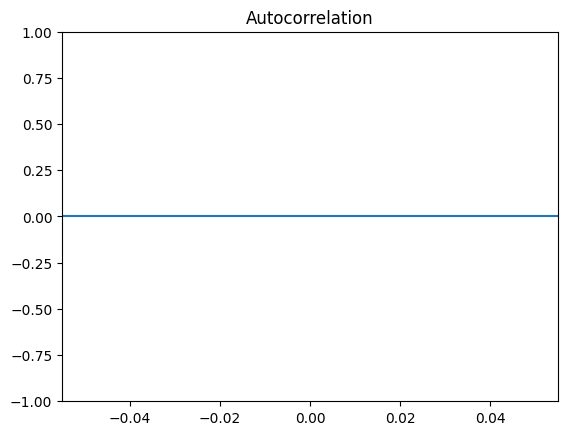

In [58]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(model_df["MORTGAGE30US"].diff())
plt.show()

In [56]:
px.line(data_frame=model_df["MORTGAGE30US"].diff())

In [48]:
tsa.stattools.acf(rates_df.FEDFUNDS)

array([1.        , 0.99785573, 0.99571147, 0.9935672 , 0.99142294,
       0.9883746 , 0.98455179, 0.98072898, 0.97690618, 0.97356408,
       0.96971218, 0.96586029, 0.96200839, 0.95831345, 0.95490296,
       0.95150941, 0.94811587, 0.94469691, 0.94132293, 0.93849229,
       0.93566166, 0.93283102, 0.92980943, 0.92727097, 0.92473249,
       0.92219402, 0.91946011, 0.91652112, 0.91420072, 0.91188032,
       0.9095529 , 0.90714426, 0.90518679, 0.90322932, 0.90127185])

In [38]:
fig = px.scatter(
    rates_df,
    x="WGS10YR",
    y="MORTGAGE30US",
    title="30-Year Fixed Rate Mortgage vs. Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity",
    hover_data={"date": True},
)
# fig.layout.yaxis.tickformat = ",.0%"
# fig.layout.xaxis.tickformat = ",.0%"

fig.show()

In [41]:
model_df = rates_df.dropna()

y = model_df["MORTGAGE30US"]
X = model_df[["WGS10YR", "FEDFUNDS", "WSHOMCB", "MORTGAGE15US"]]
X = sm.add_constant(X)

model = sm.OLS(endog=y, exog=X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           MORTGAGE30US   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.242e+04
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:28:45   Log-Likelihood:                 938.49
No. Observations:                1036   AIC:                            -1867.
Df Residuals:                    1031   BIC:                            -1842.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7153      0.025     28.454   

### 15-year mortgage vs 10-year treasury rate

In [19]:
fig = px.scatter(
    df,
    x="WGS10YR",
    y="MORTGAGE15US",
    title="15-Year Fixed Rate Mortgage vs. Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity",
    hover_data={"date": True},
)
# fig.layout.yaxis.tickformat = ",.0%"
# fig.layout.xaxis.tickformat = ",.0%"

fig.show()

In [20]:
model_df = df.dropna()

y = model_df["MORTGAGE15US"]
X = model_df["WGS10YR"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           MORTGAGE15US   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 4.223e+04
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:20:28   Log-Likelihood:                -614.81
No. Observations:                1625   AIC:                             1234.
Df Residuals:                    1623   BIC:                             1244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2229      0.021     57.741      0.0

### Distribution of spreads

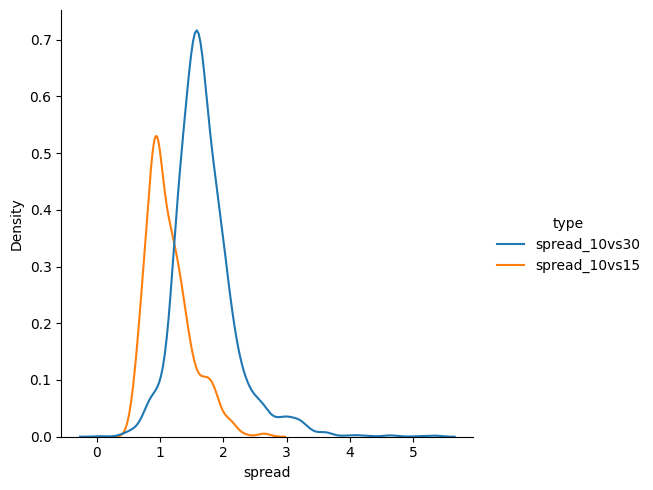

In [21]:
df1 = df[["date", "spread_10vs30"]]
df1 = df1.rename(columns={"spread_10vs30": "spread"})
df1["type"] = "spread_10vs30"

df2 = df[["date", "spread_10vs15"]]
df2 = df2.rename(columns={"spread_10vs15": "spread"})
df2["type"] = "spread_10vs15"

plt_df = pd.concat([df1, df2], axis=0).reset_index()


sns.displot(data=plt_df, x="spread", hue="type", kind="kde")

In [22]:
px.histogram(df, x="spread_10vs15")

In [23]:
px.histogram(df, x="spread_10vs30")

## MBS vs 30-year mortgage rate

In [25]:
# Join the data together based on date
df = pd.merge_asof(
    left=rates_sc.WSHOMCB.df, right=rates_sc.MORTGAGE30US.df, on="date"
)

In [26]:
df.corr()

/var/folders/5y/m5wvct_x0l18j8tw6qf011s40000gn/T/ipykernel_41874/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,WSHOMCB,MORTGAGE30US
WSHOMCB,1.000000,-0.777063
MORTGAGE30US,-0.777063,1.000000


In [ ]:
px.scatter(
    df,
    x="date",
    y="MORTGAGE30US",
    title="",
)

In [ ]:
px.scatter(
    df,
    x="date",
    y="WSHOMCB",
    title="",
)

In [ ]:
df

In [ ]:
import altair as alt

base = alt.Chart(df).encode(alt.X("date:T", axis=alt.Axis(title=None)))

line = base.mark_line().encode(
    alt.Y(
        "WSHOMCB",
        axis=alt.Axis(title=rates_sc.WSHOMCB.info.title, titleColor="#57A44C"),
    ),
)

line2 = base.mark_line().encode(
    alt.Y(
        "MORTGAGE30US",
        axis=alt.Axis(title=rates_sc.MORTGAGE30US.info.title, titleColor="#5276A7"),
    ),
    alt.Y2("MORTGAGE30US"),
)

alt.Y2

alt.layer(line, line2).resolve_scale(y="independent")

### Scratch

In [ ]:
home_sale_price_response = {s: client.get_series(s) for s in housing_starts_series}

In [ ]:
home_sale_price_response["HOUST"].info.units

In [ ]:
home_sale_price_response["HOUST"].data

In [ ]:
housing_sale_price_series_response = {
    s: client.get_series(s) for s in housing_sale_price_series
}

In [ ]:
housing_sale_price_series_response["MSPUS"].info.title

In [ ]:
mortgage_rate_series_responses = {s: client.get_series(s) for s in mortgage_rate_series}

In [ ]:
mortgage_rate_series_responses["MORTGAGE30US"].data.dtypes

## Collect home price data

# Median Sale Price

# Housing Starts

In [ ]:
housing_starts_response = {s: client.get_series(s) for s in housing_starts_series}

# State House Price Index

In [ ]:
state_hp_responses = {s: client.get_series(s) for s in state_home_price_index_series}

### Munge the data

In [ ]:
state_hp_dfs = []
state_hp_wide_dfs = []

for s in state_home_price_index_series:
    state_name = state_hp_responses[s].info.title.replace(
        "All-Transactions House Price Index for ", ""
    )

    df = (
        state_hp_responses[s]
        .data.drop(["realtime_start", "realtime_end"], axis=1)
        .copy()
    )
    df["state"] = state_name
    state_hp_dfs.append(df)

    wide_df = (
        state_hp_responses[s]
        .data.drop(["realtime_start", "realtime_end"], axis=1)
        .copy()
    )
    wide_df = wide_df.rename(columns={"value": state_name}).set_index("date")
    state_hp_wide_dfs.append(wide_df)

state_hp_df = pd.concat(state_hp_dfs, axis=0)
state_hp_wide_df = pd.concat(state_hp_wide_dfs, axis=1)

In [ ]:
state_hp_dates = get_dates(state_hp_df, "date")
rprint(f"Minimum home price date: {state_hp_dates.min}")
rprint(f"Maximum home price date: {state_hp_dates.max}")

### Percent Change Table

In [ ]:
state_hp_pct_chg_df = calc_pct_chg(
    wide_df=state_hp_wide_df.copy(),
    lags=[1, 4, 8],
    max_date=state_hp_dates.max,
    grp_var="State",
    lag_var="Quarters Ago",
    title="State Home Price Index Percent Change from Preceding Quarter",
)

# rprint(f"State Home Price Index Percent Change from Preceding Quarter, {state_hp_dates.max}")
display(state_hp_pct_chg_df)

### Plot

In [ ]:
line_plot = px.line(
    data_frame=state_hp_df,
    x="date",
    y="value",
    color="state",
    title=f"Quarterly Home Price Index by State (Index 1980:Q1=100)",
    labels=dict(value="Home Price Index", date="Date", state="State"),
)

line_plot.show(renderer="notebook")

# Case/Shiller Home Price Index

In [ ]:
cs_responses = {s: client.get_series(s) for s in case_shiller_series}

### Munge the data

In [ ]:
cs_dfs = []
cs_wide_dfs = []

for s in case_shiller_series:
    series_name = (
        cs_responses[s]
        .info.title.replace("S&P/Case-Shiller ", "")
        .replace(" Home Price Index", "")
    )

    df = cs_responses[s].data.drop(["realtime_start", "realtime_end"], axis=1).copy()

    df["series"] = series_name
    cs_dfs.append(df)

    wide_df = (
        cs_responses[s].data.drop(["realtime_start", "realtime_end"], axis=1).copy()
    )
    wide_df = wide_df.rename(columns={"value": series_name}).set_index("date")
    cs_wide_dfs.append(wide_df)

cs_df = pd.concat(cs_dfs)
cs_wide_df = pd.concat(cs_wide_dfs, axis=1)

In [ ]:
cs_dates = get_dates(cs_df, "date")
rprint(f"Minimum home price date: {cs_dates.min}")
rprint(f"Maximum home price date: {cs_dates.max}")

### Percent Change Table

In [ ]:
cs_pct_chg_df = calc_pct_chg(
    wide_df=cs_wide_df.copy().dropna(),
    lags=[1, 3, 6, 12, 18, 24, 36, 48, 60],
    max_date=cs_dates.max,
    grp_var="Series",
    lag_var="Months Ago",
    title="Case/Shiller Index Percent Change from Preceding Quarter",
)

display_pct_chg_df(
    df=cs_pct_chg_df.copy(),
    title="Seasonally Adjusted CPI, Percent Change from Preceding Month",
    max_date=dates.max,
)

display(cs_pct_chg_df)

### Plot

In [ ]:
line_plot = px.line(
    data_frame=cs_df.dropna(),
    x="date",
    y="value",
    color="series",
    title=f"Case/Shiller Home Price Index (Index Jan-2000=100)",
    labels=dict(value="CS Home Price Index", date="Date", series="Series"),
)

line_plot.show(renderer="notebook")